# Práctica 3

## Lucas Hidalgo Herrera

In [140]:
import pvi 
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy as sc
import importlib as ilib
# ilib.reload(pvi)

## Ejercicio 2 ✅
> A partir de la implementación del algoritmo del método de Euler explícito, realice las modificaciones oportunas para obtener también las implementaciones correspondientes a los métodos de Euler mejorado (o del punto medio), así como del de Euler modificado (o de Heun).

Una vez se han programado los métodos en el módulo `pvi.py` procedemos a ponerlos a prueba mediante la comparación por gráficas, el error cuadrático medio y el error absoluto.

In [141]:
t, x0, x = sp.symbols('t, x_0, x')
def f(t,x):
    return x

mu=1
a,b=0,1
def sol_exacta(t):
    return sp.exp(t)

sol_exacta_np = sp.lambdify(t, sol_exacta(t), modules='numpy') # para poder usar la función exacta en numpy
t_values = np.linspace(a, b, 100) 

t_values, x_values_ptm = pvi.euler_punto_medio(f,a,b,mu,10)
t_values, x_values_exp = pvi.euler_explicito(f,a,b,mu,10)
t_values, x_values_Heun= pvi.euler_Heun(f,a,b,mu,10)
x_values = sol_exacta_np(t_values)

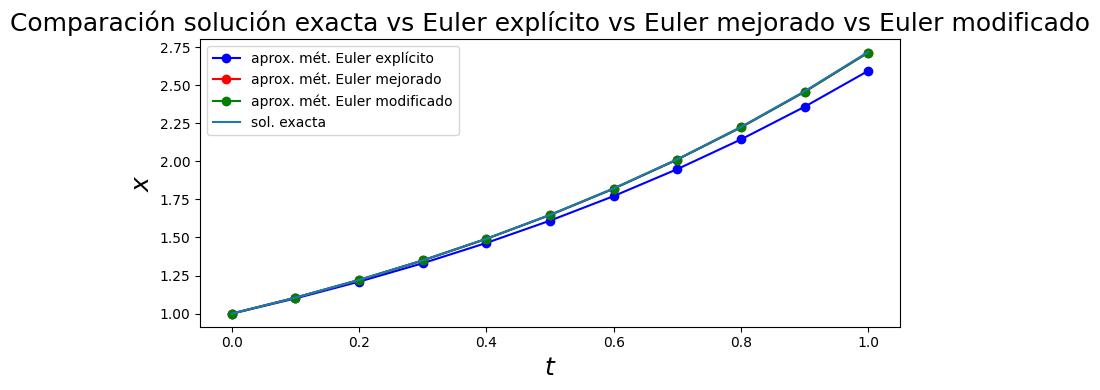

In [142]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t_values, x_values_exp,'bo-',label = "aprox. mét. Euler explícito")
ax.plot(t_values, x_values_ptm, 'ro-',label = "aprox. mét. Euler mejorado")
ax.plot(t_values, x_values_Heun, 'go-',label = "aprox. mét. Euler modificado")
ax.plot(t_values,x_values,label=f"sol. exacta")
ax.set_title(r"Comparación solución exacta vs Euler explícito vs Euler mejorado vs Euler modificado", fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_Eulerexpl = fig

Como la gráfica no deja nada en claro, vamos a calcular los errores cuadráticos medios y absolutos de cada método.

In [143]:
ECM_EPTM = ((x_values_ptm - sol_exacta_np(t_values))**2).mean()
ECM_EE = ((x_values_exp - sol_exacta_np(t_values))**2).mean()
ECM_EH = ((x_values_Heun - sol_exacta_np(t_values))**2).mean()

print(f"ECM Euler explícito: {ECM_EE}")
print(f"ECM Euler mejorado: {ECM_EPTM}")    
print(f"ECM Euler modificado: {ECM_EH}")

ECM Euler explícito: 0.003826084167431926
ECM Euler mejorado: 4.324701200821029e-06
ECM Euler modificado: 4.324701200821029e-06


In [144]:
MEA_PTM = np.max(np.abs(x_values_ptm - sol_exacta_np(t_values)))
MEA_EE = np.max(np.abs(x_values_exp - sol_exacta_np(t_values)))
MEA_EH = np.max(np.abs(x_values_Heun - sol_exacta_np(t_values)))

print(f"MEA Euler explícito: {MEA_EE}")
print(f"MEA Euler mejorado: {MEA_PTM}")
print(f"MEA Euler modificado: {MEA_EH}")


MEA Euler explícito: 0.124539368359045
MEA Euler mejorado: 0.004200981850821073
MEA Euler modificado: 0.004200981850821073


Por tanto, vemos que tanto **Euler mejorado** como **Euler modificado** son buenas aproximaciones a la solución; algo curioso es que obtienen tanto el mismo error cuadrático medio como el máximo error absoluto.

## Ejercicio  4 ✅:
> Programe el método de Runge-Kutta de 4 evaluaciones y grafique la sucesión de aproximaciones y calcule el error cuadrático medio y el máximo error absoluto con respecto a la solución exacta.

Usaremos el mismo ejemplo de PVI que hemos usado en el ejercicio anterior. Tomaremos la funcion `RK4` del módulo `pvi.py` para obtener la posible solución.


In [145]:
t_values, x_values_rk4= pvi.RK4(f,a,b,mu,10)

Una vez obtenidos los valores según el método de **Runge-Kutta 4** procedemos a realizar la gráfica de comparación con la solución exacta.

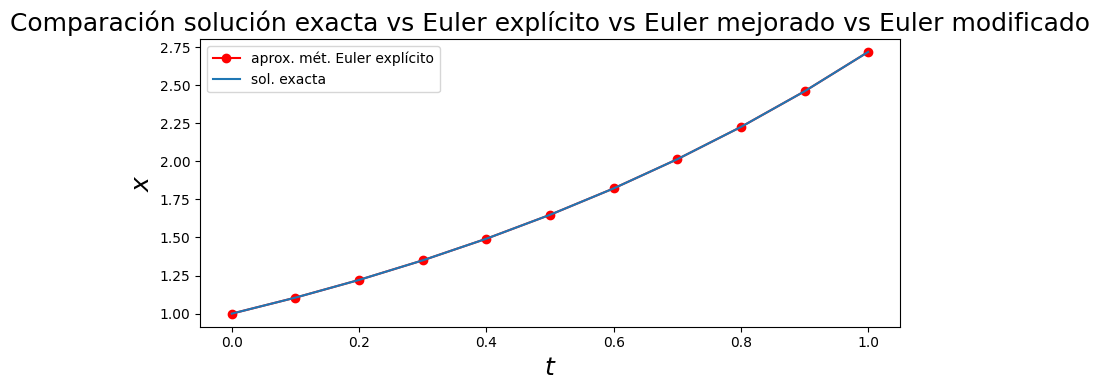

In [146]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t_values, x_values_rk4,'ro-',label = "aprox. mét. Euler explícito")
ax.plot(t_values,x_values,label=f"sol. exacta")
ax.set_title(r"Comparación solución exacta vs Euler explícito vs Euler mejorado vs Euler modificado", fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_Eulerexpl = fig

A simple ojo parece que todo es perfecto, no obstante, para corroborarlo vamos a calcular el error cuadrático medio y el máximo error absoluto.

In [147]:
ECM_RK4 = ((x_values_rk4 - sol_exacta_np(t_values))**2).mean()
MEA_RK4 = np.max(np.abs(x_values_rk4 - sol_exacta_np(t_values)))

print(f"MEA RK4: {MEA_RK4}")
print(f"ECM RK4: {ECM_RK4}")

MEA RK4: 2.0843238792700447e-06
ECM RK4: 1.0643544715729965e-12


Por tanto, la aproximación puede considerarse bastante buena, pues el orden del error cuadrático medio es de $10^{-12}$ y del máximo error absoluto $10^{-6}$. Esto nos indica que el valor de aproximación obtenido es muy muy similar al valor exacto.

## Ejercicio 5 (Ejercicio final de las diapositivas) ✅:
> Se pretende aproximar la solución del PVI:
> $$
> \left\{\begin{array}{rcl}
> x'(t) &=& \dfrac{t-x(t)} 2 \\
> x(0) &=& 1
> \end{array}\right..
> $$
> en $[0,3]$
> 1. Usa el método de Runge-Kutta de 2 evaluaciones con $\alpha= 3/4$ y $\beta=2/3$ para $h = 1$, $h = 1/2$, $h = 1/4$ y $h = 1/8$ y compara los resultados obtenidos.
> 2. Repite el apartado anterior usando Runge-Kutta clásico.
> 
> Nota: La solución exacta es $x(t) = 3 e^{-t/2} + t -2$.

In [148]:
t, x0, x = sp.symbols('t, x_0, x')
alpha,beta=0.75,2/3
mu=1
N=3
a,b=0,3
def f2(t,x):
    return (t-x)/2
def sol_exacta2(t):
    return 3*sp.exp(-t/2) + t - 2

sol_exacta_np2 = sp.lambdify(t, sol_exacta2(t), modules='numpy')

t_values = np.linspace(0, 3, 100)


### Apartado 1

Para este apartado, simplemente vamos a obtener los valores de x necesarios para la realización de la comparación. Compararemos usando las dos medidas que conocemos.

In [149]:
t_values_h1,x_values_h1= pvi.RK2(f2,a,b,mu,N,alpha,beta)
t_values_h1_2,x_values_h1_2= pvi.RK2(f2,a,b,mu,2*N,alpha,beta)
t_values_h1_4,x_values_h1_4= pvi.RK2(f2,a,b,mu,4*N,alpha,beta)
t_values_h1_8,x_values_h1_8= pvi.RK2(f2,a,b,mu,8*N,alpha,beta)
x_values= sol_exacta_np2(t_values)

Para corroborar que los resultados pueden ser los correctos vamos a realizar la gráfica de todas las aproximaciones; obtendremos que la gráfica se aproxima más a la función a medida que aumenta el valor del paso, como cabía esperar.

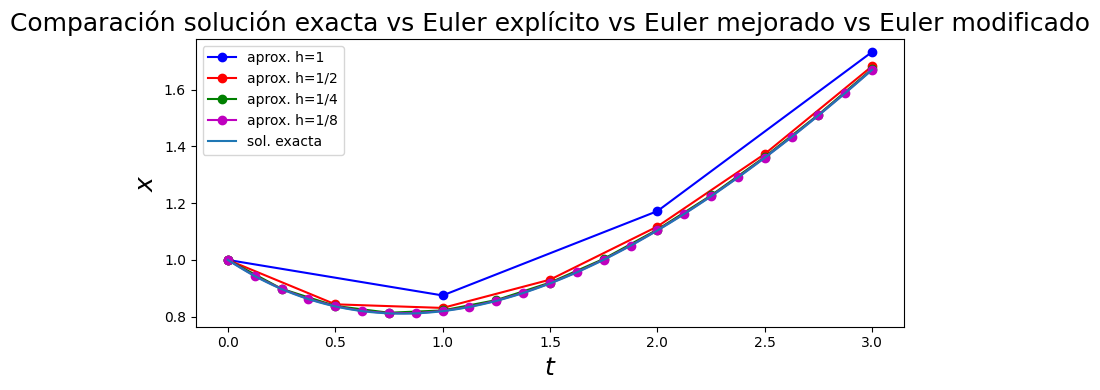

In [150]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t_values_h1, x_values_h1,'bo-',label = "aprox. h=1")
ax.plot(t_values_h1_2, x_values_h1_2, 'ro-',label = "aprox. h=1/2")
ax.plot(t_values_h1_4, x_values_h1_4, 'go-',label = "aprox. h=1/4")
ax.plot(t_values_h1_8, x_values_h1_8, 'mo-',label = "aprox. h=1/8")
ax.plot(t_values,x_values,label=f"sol. exacta")
ax.set_title(r"Comparación solución exacta vs Euler explícito vs Euler mejorado vs Euler modificado", fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_Eulerexpl = fig

Se puede ya intuir que con $h=\frac{1}{8}$ conseguimos la mejor aproximación de todas. No obtante, vamos a calcular el error cuadrático medio y el máximo error absoluto para corroborarlo.

In [151]:
ECM_RK2_h1 = ((x_values_h1 - sol_exacta_np2(t_values_h1))**2).mean()
ECM_RK2_h1_2 = ((x_values_h1_2 - sol_exacta_np2(t_values_h1_2))**2).mean()
ECM_RK2_h1_4 = ((x_values_h1_4 - sol_exacta_np2(t_values_h1_4))**2).mean()
ECM_RK2_h1_8 = ((x_values_h1_8 - sol_exacta_np2(t_values_h1_8))**2).mean()

print(f"ECM RK2, h=1: {ECM_RK2_h1}")
print(f"ECM RK2, h=1/2: {ECM_RK2_h1_2}")
print(f"ECM RK2, h=1/4: {ECM_RK2_h1_4}")
print(f"ECM RK2, h=1/8: {ECM_RK2_h1_8}")

ECM RK2, h=1: 0.002924812373294217
ECM RK2, h=1/2: 0.00012955251073372697
ECM RK2, h=1/4: 6.86594243269606e-06
ECM RK2, h=1/8: 3.9627210706133287e-07


In [152]:
MEA_RK2_h1 = np.max(np.abs(x_values_h1 - sol_exacta_np2(t_values_h1)))
MEA_RK2_h1_2 = np.max(np.abs(x_values_h1_2 - sol_exacta_np2(t_values_h1_2)))
MEA_RK2_h1_4 = np.max(np.abs(x_values_h1_4 - sol_exacta_np2(t_values_h1_4)))
MEA_RK2_h1_8 = np.max(np.abs(x_values_h1_8 - sol_exacta_np2(t_values_h1_8)))

print(f"MEA RK2: {MEA_RK2_h1}")
print(f"MEA RK2: {MEA_RK2_h1_2}")
print(f"MEA RK2: {MEA_RK2_h1_4}")
print(f"MEA RK2: {MEA_RK2_h1_8}")

MEA RK2: 0.068236676485673
MEA RK2: 0.013948766024247217
MEA RK2: 0.00316140872783377
MEA RK2: 0.000753292635305991


Como se puede ver, con $h=\frac{1}{8}$ obtenemos el menor valor de error cuadrático medio. De la misma manera, el caso $h=\frac{1}{8}$ es el que tiene el menor máximo error absoluto. Podemos ya concluir de forma justificada que con valor $h=\frac{1}{8}$ obtenemos la mejro aproximación de las calculada.

### Apartado 2

Vamos a repetir los mismo cálculos realizados anteriormente con **Runge-Kutta 4**.

In [153]:
t_values_h1,x_values_h1= pvi.RK4(f2,a,b,mu,N)
t_values_h1_2,x_values_h1_2= pvi.RK4(f2,a,b,mu,2*N)
t_values_h1_4,x_values_h1_4= pvi.RK4(f2,a,b,mu,4*N)
t_values_h1_8,x_values_h1_8= pvi.RK4(f2,a,b,mu,8*N)
x_values= sol_exacta_np2(t_values)

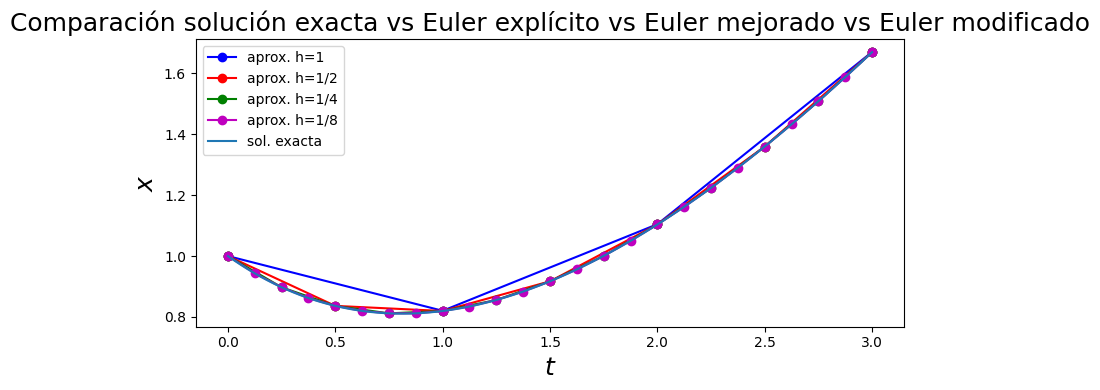

In [154]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t_values_h1, x_values_h1,'bo-',label = "aprox. h=1")
ax.plot(t_values_h1_2, x_values_h1_2, 'ro-',label = "aprox. h=1/2")
ax.plot(t_values_h1_4, x_values_h1_4, 'go-',label = "aprox. h=1/4")
ax.plot(t_values_h1_8, x_values_h1_8, 'mo-',label = "aprox. h=1/8")
ax.plot(t_values,x_values,label=f"sol. exacta")
ax.set_title(r"Comparación solución exacta vs Euler explícito vs Euler mejorado vs Euler modificado", fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_Eulerexpl = fig

In [155]:
ECM_RK4_h1 = ((x_values_h1 - sol_exacta_np2(t_values_h1))**2).mean()
ECM_RK4_h1_2 = ((x_values_h1_2 - sol_exacta_np2(t_values_h1_2))**2).mean()
ECM_RK4_h1_4 = ((x_values_h1_4 - sol_exacta_np2(t_values_h1_4))**2).mean()
ECM_RK4_h1_8 = ((x_values_h1_8 - sol_exacta_np2(t_values_h1_8))**2).mean()

print(f"ECM RK4, h=1: {ECM_RK4_h1}")
print(f"ECM RK4, h=1/2: {ECM_RK4_h1_2}")
print(f"ECM RK4, h=1/4: {ECM_RK4_h1_4}")
print(f"ECM RK4, h=1/8: {ECM_RK4_h1_8}")

ECM RK4, h=1: 4.790567234487523e-07
ECM RK4, h=1/2: 1.3056688692000142e-09
ECM RK4, h=1/4: 4.267668099104919e-12
ECM RK4, h=1/8: 1.526476736952228e-14


In [156]:
MEA_RK4_h1 = np.max(np.abs(x_values_h1 - sol_exacta_np2(t_values_h1)))
MEA_RK4_h1_2 = np.max(np.abs(x_values_h1_2 - sol_exacta_np2(t_values_h1_2)))
MEA_RK4_h1_4 = np.max(np.abs(x_values_h1_4 - sol_exacta_np2(t_values_h1_4)))
MEA_RK4_h1_8 = np.max(np.abs(x_values_h1_8 - sol_exacta_np2(t_values_h1_8)))

print(f"MEA RK4, h=1: {MEA_RK4_h1}")
print(f"MEA RK4, h=1/2: {MEA_RK4_h1_2}")
print(f"MEA RK4, h=1/4: {MEA_RK4_h1_4}")
print(f"MEA RK4, h=1/8: {MEA_RK4_h1_8}")

MEA RK4, h=1: 0.0008742090377562572
MEA RK4, h=1/2: 4.42747059188342e-05
MEA RK4, h=1/4: 2.4922515280412227e-06
MEA RK4, h=1/8: 1.4784338575601907e-07


Aunque se obtienen conclusiones idénticas a las del apartado anterior, podemos ver que, con **Runge-Kutta 4** la diferencia con el paso anterior no es tan notoria. Es decir, la aproximación con $h=\frac{1}{8}$ y $h=\frac{1}{4}$ han pasado a no diferenciarse tanto. Tanto es así que, su diferencia de orden en el error cuadrático medio es de 2 órdenes de magnitud. 

## Ejercicio 7 ✅:
> Implemente un método MML Predictor-Corrector combinando un predictor AB de 5 pasos con un corrector AM de 4, y aplicando una sólo corrección en cada iteración:
> $$
> P: \qquad x_{n+5}^{(0)} = x_{n+4} + \frac{h}{720} (1901 f_{n+4} -2774 f_{n+3} +2616 f_{n+2} - 1274 f_{n+1} + 251 f_n)
> $$
> $$
> C^1: \qquad  x_{n+5} = x_{n+4} + \frac{h}{720} (251 f(t_{n+5},x_{n+5}^{(0)}) + 646 f_{n+4} -264 f_{n+3} +106 f_{n+2} - 19 f_{n+1} )
> $$

Vamos a probar que el método funciona comparandolo con el primer problema de valores iniciales que hemos tratado de solucionar.

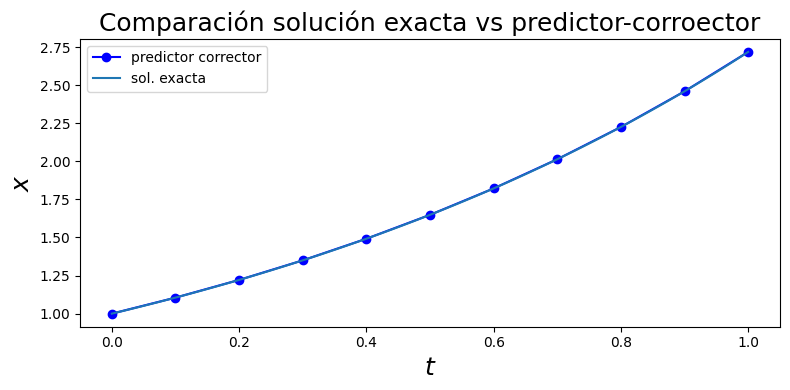

In [157]:
x_0,x_1,x_2,x_3,x_4=sol_exacta_np(0),sol_exacta_np(0.1),sol_exacta_np(0.2),sol_exacta_np(0.3),sol_exacta_np(0.4)

t_values_pc, x_values_pc= pvi.predictor_corrector_AB5_AM4(f,0,1,x_0,x_1,x_2,x_3,x_4,10)
t_values= np.linspace(0, 1, 100)
x_values= sol_exacta_np(t_values)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t_values_pc, x_values_pc,'bo-',label = "predictor corrector")
ax.plot(t_values,x_values,label=f"sol. exacta")
ax.set_title(r"Comparación solución exacta vs predictor-corroector", fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_Eulerexpl = fig

Para asegurarnos de que la aproximación es buena, vamos a calcular el error cuadrático medio y el máximo error absoluto.

In [158]:
ECM_pc = ((x_values_pc - sol_exacta_np(t_values_pc))**2).mean()

print(f"ECM RK4, h=1: {ECM_pc}")

ECM RK4, h=1: 2.4030017736657576e-15


In [159]:
MEA_pc = np.max(np.abs(x_values_pc - sol_exacta_np(t_values_pc)))

print(f"MEA RK4: {MEA_pc}")

MEA RK4: 1.1321392001661934e-07


Por tanto, la aproximación considerada es bastante buena, pues el orden de los errores es bastante bajo.

## Ejercicio 9 ✅:
> Dado el siguiente PVI definido para $t\in[0,1]$:
> $$\left\{\begin{array}{rcl}
> x'(t) &=& \cos(x(t)) + t^2 \\
> x(0) &=& 1
> \end{array}\right.
> $$
> a) Intente encontrar la solución exacta del PVI.
>
> b) Aproxime numéricamente el PVI utilizando los métodos que considere y represente gráficamente las diferentes aproximaciones en el intervalo $[0,1]$.
>
> c) Para el método que observe que devuelve mejores resultados, estudie su sensibilidad a distintos valores de $N$ (por tanto de $h$).

In [160]:
from scipy.integrate import solve_ivp

N=10
a,b=0,1

def f3(t, x):
    return np.cos(x) + t**2

### Apartado 1

Tras un tiempo investigando he encontrado esta posible solución con la funcion `solve_ivp`. Esta función realiza una aproximación numérica de la solución al problema, lo cual no puede servir de pivote de comparación de soluciones y es así cómo lo voy a usar.

In [161]:
help(solve_ivp)

Help on function solve_ivp in module scipy.integrate._ivp.ivp:

solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)
    Solve an initial value problem for a system of ODEs.

    This function numerically integrates a system of ordinary differential
    equations given an initial value::

        dy / dt = f(t, y)
        y(t0) = y0

    Here t is a 1-D independent variable (time), y(t) is an
    N-D vector-valued function (state), and an N-D
    vector-valued function f(t, y) determines the differential equations.
    The goal is to find y(t) approximately satisfying the differential
    equations, given an initial value y(t0)=y0.

    Some of the solvers support integration in the complex domain, but note
    that for stiff ODE solvers, the right-hand side must be
    complex-differentiable (satisfy Cauchy-Riemann equations [11]_).
    To solve a problem in the complex domain, pass y0 with a complex data type.

[[1.         1.00543479 1.01082547 1.01617432 1.0214836  1.02675554
  1.03199239 1.03719634 1.0423696  1.04751434 1.05263274 1.05772695
  1.06279935 1.06785254 1.07288857 1.07790944 1.08291715 1.08791367
  1.09290099 1.09788104 1.10285578 1.10782713 1.11279701 1.11776731
  1.12273993 1.12771673 1.13269959 1.13769034 1.14269083 1.14770286
  1.15272825 1.15776879 1.16282626 1.16790243 1.17299905 1.17811785
  1.18326057 1.18842892 1.19362459 1.19884927 1.20410464 1.20939234
  1.21471404 1.22007134 1.22546589 1.23089927 1.23637309 1.24188891
  1.24744831 1.25305283 1.25870401 1.26440337 1.27015243 1.27595268
  1.2818056  1.28771267 1.29367533 1.29969504 1.30577322 1.31191129
  1.31811064 1.32437268 1.33069877 1.33709028 1.34354855 1.35007491
  1.3566707  1.36333722 1.37007576 1.37688761 1.38377403 1.39073627
  1.39777558 1.40489318 1.41209029 1.4193681  1.42672781 1.43417059
  1.44169759 1.44930996 1.45700884 1.46479535 1.47267058 1.48063564
  1.48869159 1.49683952 1.50508046 1.51341546 1.

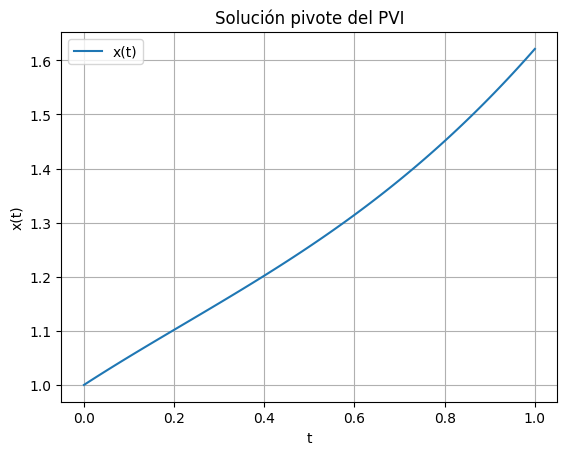

In [162]:
# Condiciones iniciales
t0 = 0
x0 = 1

# Intervalo de integración
t_span = (t0, x0)

# Puntos donde queremos la solución (para graficar)
t_values = np.linspace(t0, t_span[1], 100)

# Resolvemos el PVI usando solve_ivp
sol = solve_ivp(f3, t_span, [x0], t_eval=t_values, method='RK45')
print(sol.y)

# Graficamos la solución
plt.plot(sol.t, sol.y[0], label="x(t)")
plt.title("Solución pivote del PVI")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(True)
plt.legend()
plt.show()


### Apartado 2

Usaremos métodos que dispongan de un único paso y, por motivos de importancia, trataremos de usar el método de **Runge-Kutta 4** y el método **predictor-corrector** del ejercicio anterior. Para poder obtener una mejor comparativa vamos a realizar una gráfica de cada método por separado, pues de forma conjunta no vamos a obtener una buena comparativa.

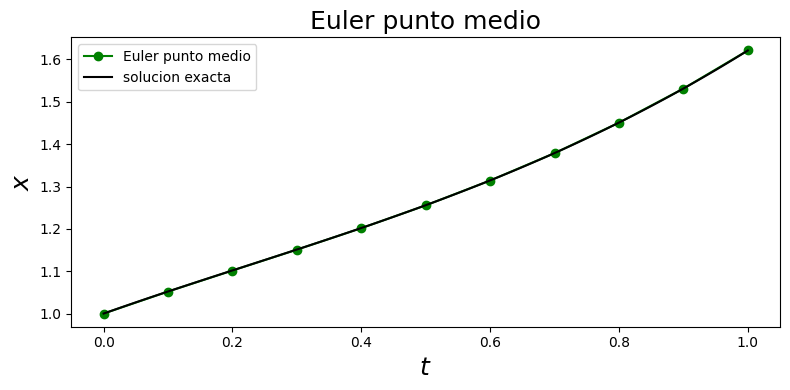

In [163]:
# Tomamos valores iniciales
x0,x1,x2,x3,x4=pvi.getX(0,sol), pvi.getX(0.1,sol),pvi.getX(0.2,sol), pvi.getX(0.3,sol),pvi.getX(0.4,sol)

#Evaluamos el método
t_values_ptm,x_values_ptm= pvi.euler_punto_medio(f3,a,b,x0,10)

# Pintamos las soluciones
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(t_values_ptm, x_values_ptm, 'go-',label = "Euler punto medio")
ax.plot(sol.t, sol.y[0], 'k-', label="solucion exacta")

ax.set_title(r"Euler punto medio", fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_predictor_corrector = fig

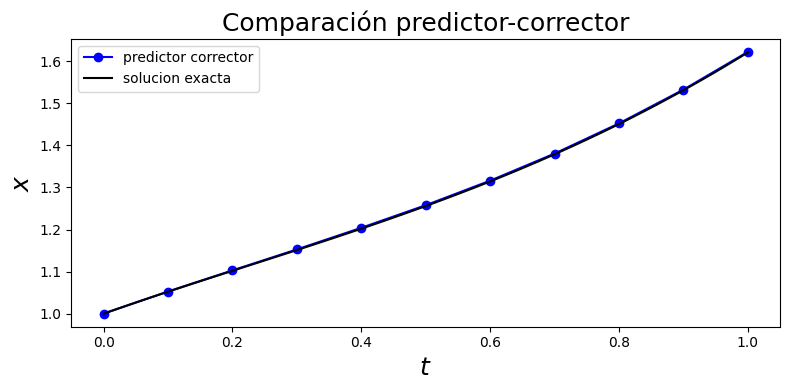

In [164]:
#Evaluamos el método
t_values_pc, x_values_pc= pvi.predictor_corrector_AB5_AM4(f3,a,b,x0,x1,x2,x3,x4,10)

# Pintamos las soluciones
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t_values_pc, x_values_pc,'bo-',label = "predictor corrector")
ax.plot(sol.t, sol.y[0], 'k-', label="solucion exacta")

ax.set_title(r"Comparación predictor-corrector", fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_predictor_corrector = fig

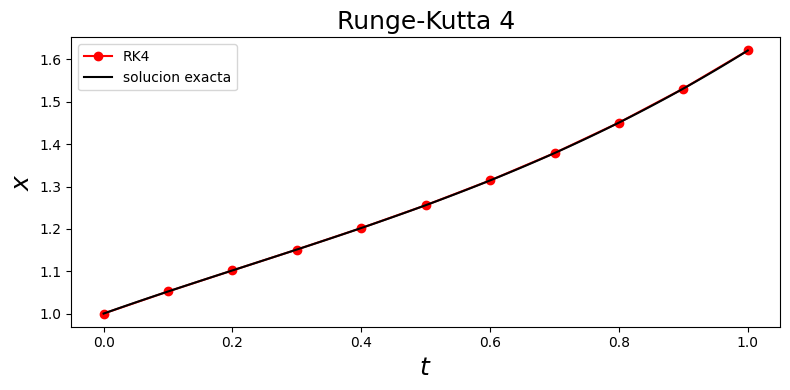

In [165]:
#Evaluamos el método
t_values_rk4, x_values_rk4 = pvi.RK4(f3, a, b, x0, N)

# Pintamos las soluciones
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t_values_rk4, x_values_rk4, 'ro-',label = "RK4")
ax.plot(sol.t, sol.y[0], 'k-', label="solucion exacta")

ax.set_title(r"Runge-Kutta 4", fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_predictor_corrector = fig

Es claro que, todas las soluciones parecen buenas en la gráfica. Cabe destacar, que hemos usado una aproximación de la solución exacta, es decir, no podemos asgurar que la solución aportada por cada uno de los métodos sea excelente pues partimos de un error desconocido.

### Apartado 3

Debido a que, si nos fijamos bien, parece que el método **predictor-corrector** obtiene resultados peores que **Runge-Kutta 4**, vamos a realizar el estudio de la sensibilidad en este método.

In [166]:
x_values = []
t_values = []
for N in range(1,30):
    t_vals,x = pvi.RK4(f3,a,b,x0,N)
    t_values.append(t_vals)
    x_values.append(x)

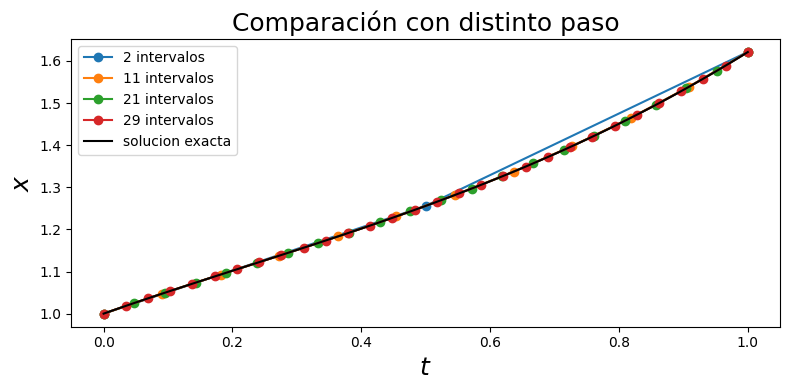

In [167]:
# Pintamos las soluciones
fig, ax = plt.subplots(figsize=(8, 4))

for N in [1,10,20,28]:
    ax.plot(t_values[N], x_values[N],'o-',label = str(N+1)+' intervalos')
    
ax.plot(sol.t, sol.y[0], 'k-', label="solucion exacta")

ax.set_title("Comparación con distinto paso", fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_predictor_corrector = fig

Por tanto, podemos concluir que, **Runge-Kutta 4**, con $N>10$ no llega a apreciarse correctamente la mejoría de la solución. Es decir, tomando un $N>10$ podemos asumir que tendremos una buena solución.

Hablando en términos de sensibilidad, estamos viendo que, ante cambios de $N$, el método de **Runge-Kutta 4** no es muy sensible cuando $N$ ya es un valor que podemos considerar alto. Sin embargo, si empezamos con un $N$ bajo podemos concluir que sí que es sensible en esa escala.